In [ ]:
pip install mglearn

     |████████████████████████████████| 542kB 4.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a8bb9ea1401c5b6961a959529afc5e62a5197725cc90d8271e963c1a5879e902
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


한글깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import mglearn
import matplotlib.pyplot as plt

k-최근접 이웃

k-최근접 이웃 분류 : 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트를 찾음 -> 최근접 이웃(Nearest Neighbors)

forge 데이터셋 분류 예 -> forge 데이터셋에 대한 1- 최근접 이웃 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


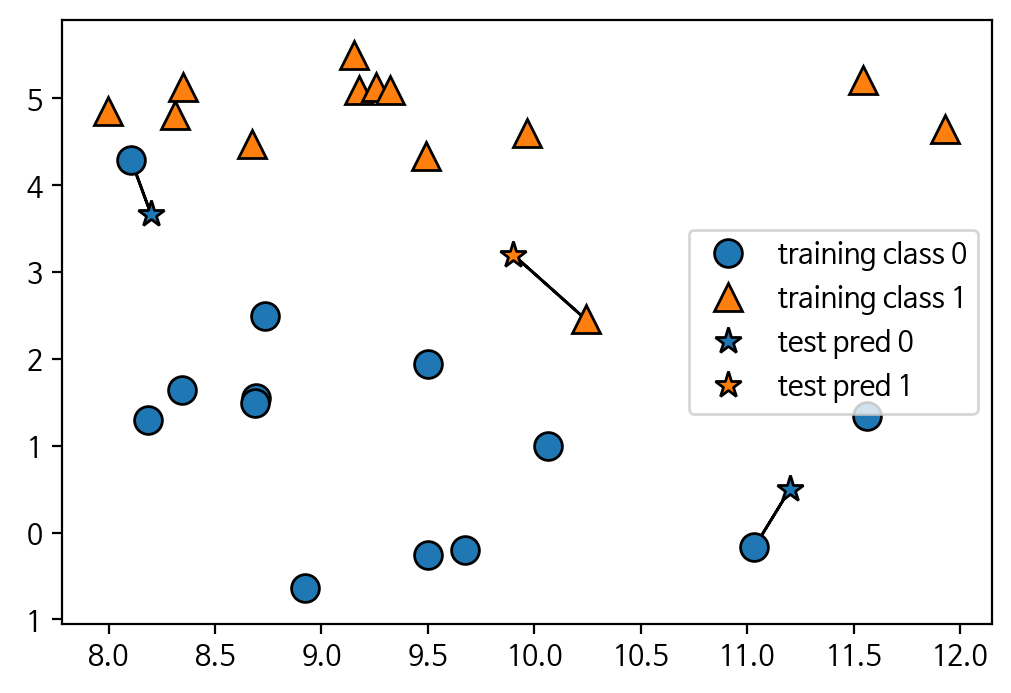

In [ ]:
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

# knn의 classification이 이런식으로 작동한다 예시를 보여주는 것
mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃 선택

분류 문제정의 : forge 데이터 셋을 사용한 이진 분류(Label,1) 예측하기 <br>
k-최근접 이웃 알고리즘 적용하여 예측하고 평가하기

데이터 준비하기

In [ ]:
X,y = mglearn.datasets.make_forge() # X : 데이터(feature), y: 레이블(Label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


일반화 성능을 평가할 수 있도록 데이터 분리 (교차검증) -> 훈련세트(trainset)
테스트세트(testset)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7) 
# X는 문제고 y는 정답으로 radom_state 나눠주세요

KNeighborsClassifier를 임포트하고 객체 생성

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) # 이웃의 수 3개 지정

훈련 세트를 사용하여 분류 모델 학습

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

테스트 데이터에 대해 predict 메서드를 호출해서 예측

테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산 -> <br> 다음 가장 많은 클래스를 찾기 -> 예측

In [ ]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

모델이 얼마나 잘 일반화되었는지 평가 -> 정확도

score() 함수 사용 -> 테스트 데이터와 테스트 레이블을 넣어 호출

In [ ]:
clf.score(X_test, y_test)

0.8571428571428571

In [ ]:
# 학습했던 데이터는 100% 나올까?
clf.score(X_train, y_train)
# 조금은 높게 나오지만 100%는 아님.

0.9473684210526315

KNeighborClassifier 분석

*   이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
*   이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
*   부드러운 경계는 더 단순한 모델을 의미





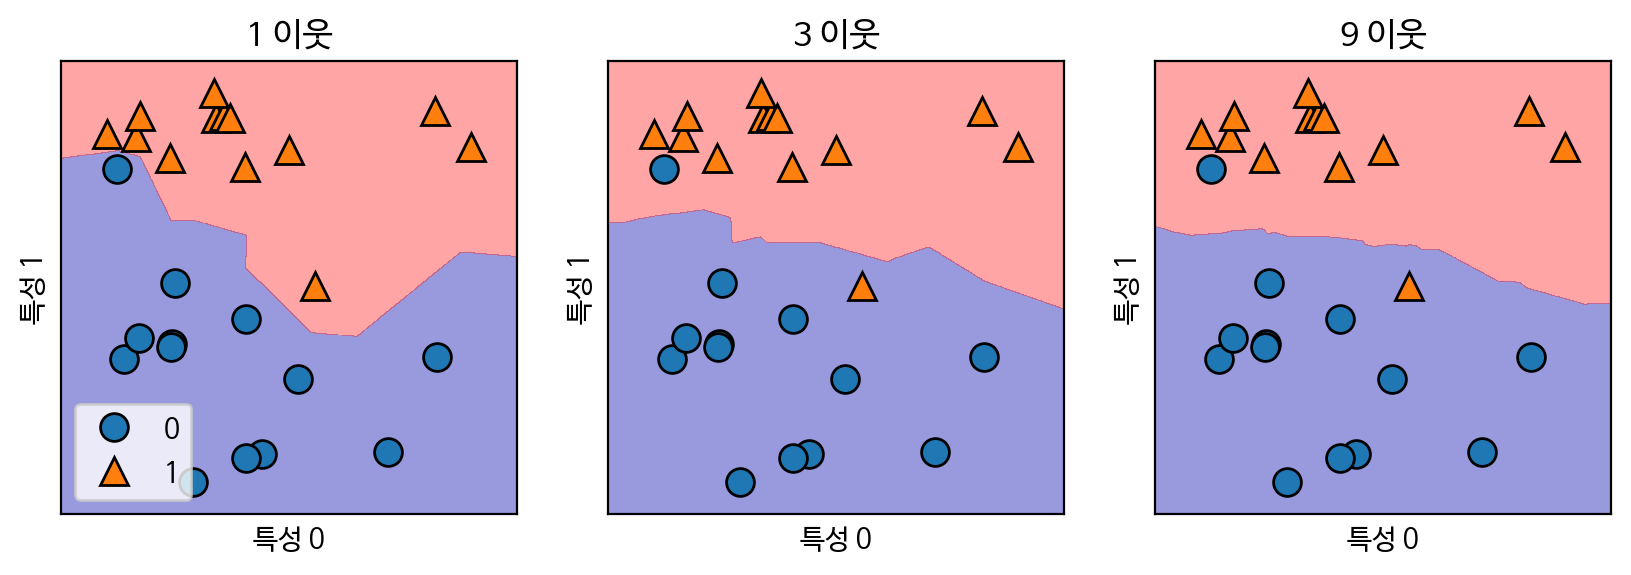

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10,3), dpi = 100) # 1의 표를 3개 그리겠다

for n_neighbors, ax in zip([1,3,9], axes): # 이웃을 1,3,9 일 때의 결정 경계(decision boundary)
  
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y) # n_neighbors 디폴트 값 5이기 때문에
  # n_neighbors를 같다고 설정해서 1,3,9로 뽑으려고 함
  
  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  # eps 는 반경 설정
  mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax) # 2차원 산점도 그리기 위해
  # 경계가 먼저 그려진 다음 데이터셋을 그림
  
  ax.set_title('{} 이웃'.format(n_neighbors))
  ax.set_xlabel('특성 0')
  ax.set_ylabel('특성 1')

axes[0].legend(loc=3)  # axes 0번째에만 범례 추가
plt.show()

# 1이웃은 overfitting 되어서 딱딱 떨어짐 융통성이 없어서 중간값이 받아들여지지 않음
# 하지만 9이웃은 좀 더 일반화되어서 나타나게됨 --> 

이웃의 수(결정경계)에 따른 성능 평가

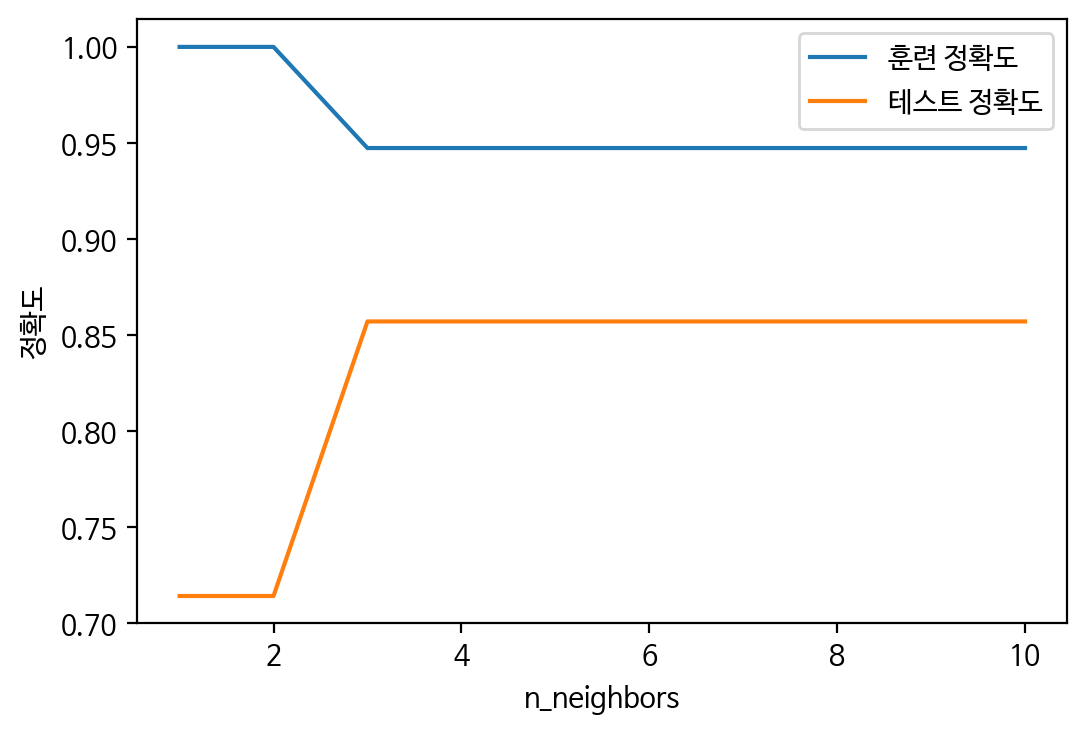

In [ ]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

유방암 데이터셋을 사용하여 이웃의 수(결정경계)에 따른 성능 평가

데이터 준비하기

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 데이터 다운로드


데이터셋 분리하기 (훈련셋, 테스트셋)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=777
)

이웃의 수(결정경계)에 따른 성능 평가

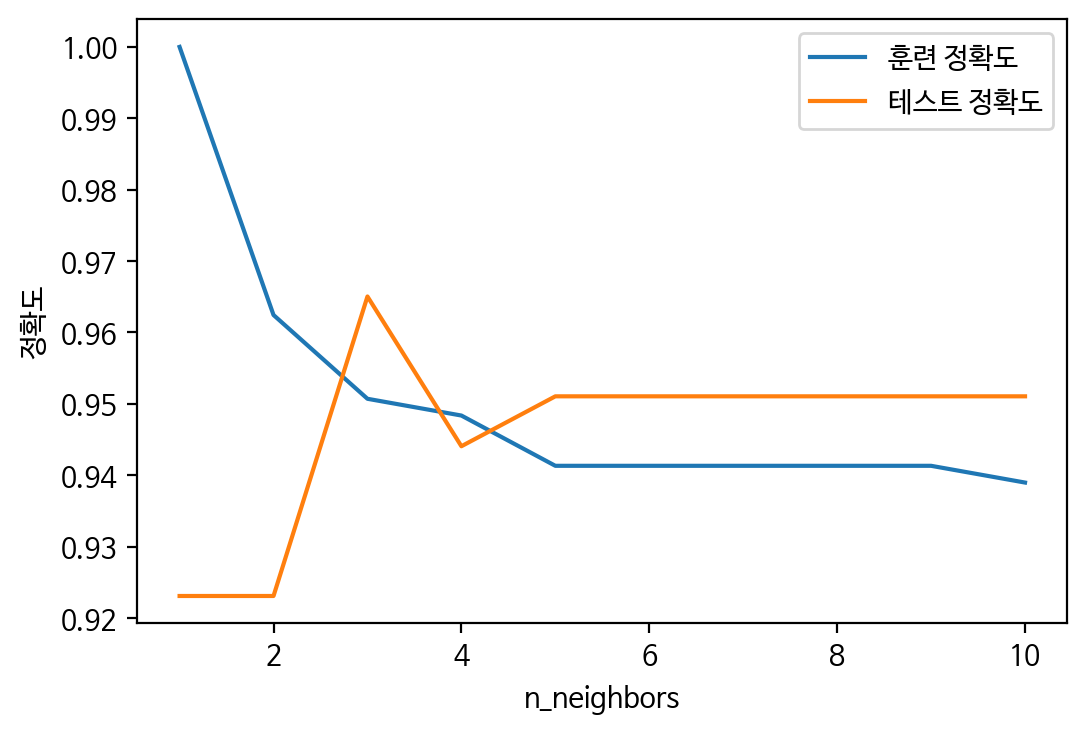

In [ ]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
# 오버피팅 되어있을 수 있음 훈련 정확도는 100인데 테스트 정확도는 92

성능평가 - ROC 커브

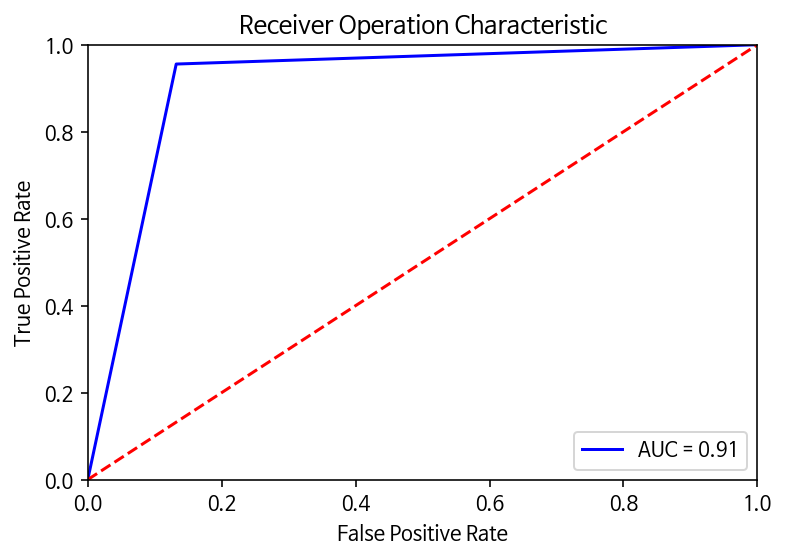

In [ ]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operation Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2F' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = clf.predict(X_test)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.92      0.96      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [ ]:
# sklearn 을 이용하면 전부 계산해준다.
print('accuracy: ', metrics.accuracy_score(y_test, y_hat))
print('precision: ', metrics.precision_score(y_test, y_hat))
print('recall:', metrics.recall_score(y_test,y_hat))
print('f1: ', metrics.f1_score(y_test,y_hat))

accuracy:  0.9230769230769231
precision:  0.9247311827956989
recall: 0.9555555555555556
f1:  0.9398907103825136


k-Neighbors Regression
* k=1 경우 그냥 가장 가까운 이웃의 타켓값
* k >=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값

wave 데이터셋을 사용하여 이웃의 수(결정경계)에 따라 성능 평가

데이터 셋 분리하기(훈련셋,테스트셋)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) # test_size = 0.25

KNeighborsRegressor를 임포트하고 객체 생성

In [ ]:
# 이웃의 수는 3으로 하여 모델 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

훈련 세트를 사용하여 회귀 모델 학습

In [ ]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

성능평가 하기

In [ ]:
# score r-square 결정계수 0~1 사이 값을 갖고, 관계가 높을 수록 1에 가까운 값을 갖음
# 0에 가까울 수록 데이터 분포를 제대로 표현하지 못한 것
# 1은 예측이 완벽한 경우 0은 훈련 세트의 출력값이 y_train의 평균으로만 예측하는 모델
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


KNeighborsRegressor 분석

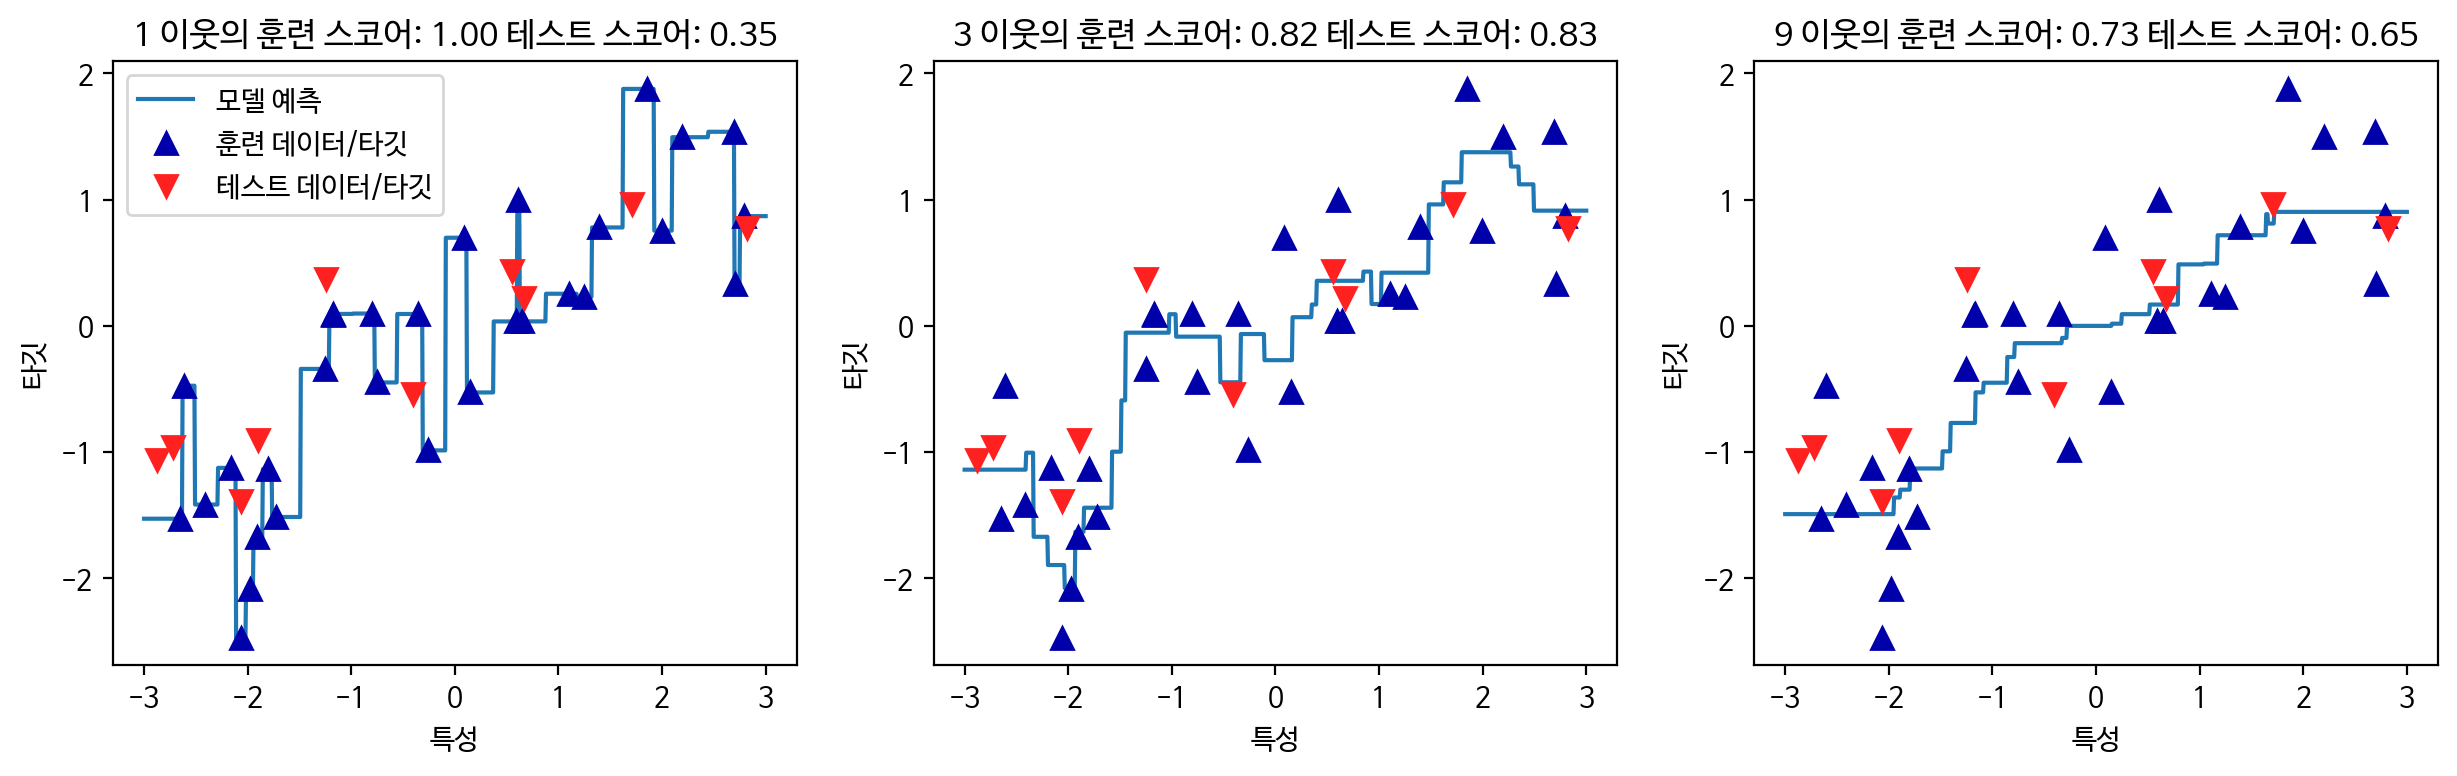

In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()


선형 모델 : 선형 함수를 만들어 예측 수행

선형 회귀 모델

w[0]: 0.393906  b: -0.031804


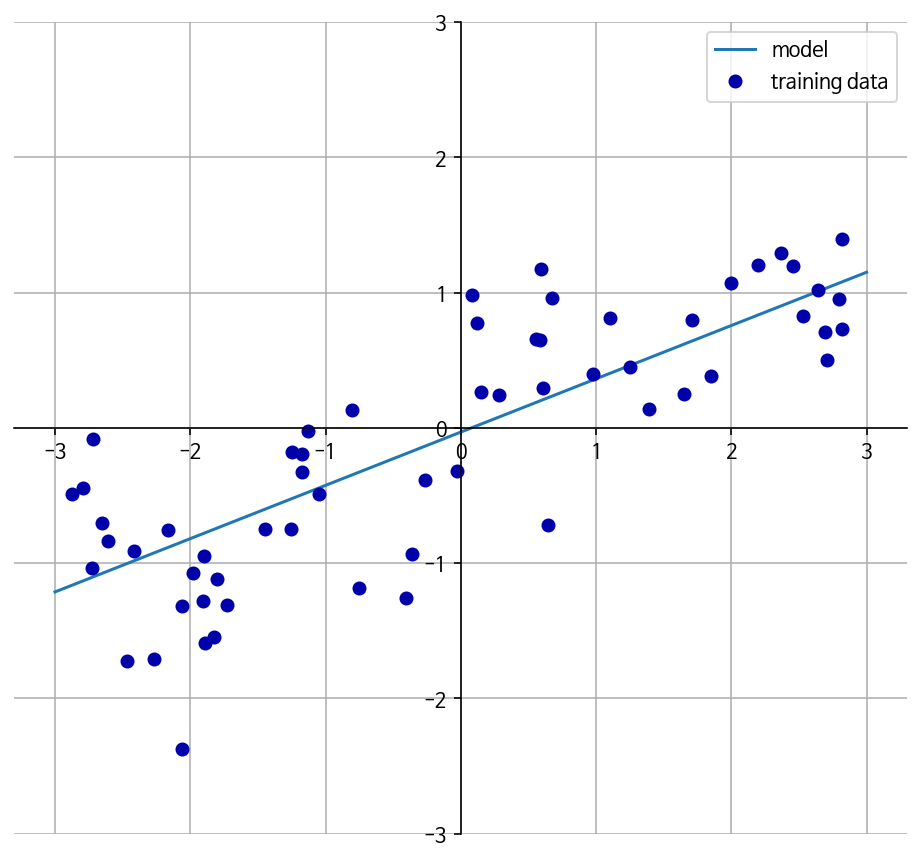

In [ ]:
mglearn.plots.plot_linear_regression_wave()

선형회귀(최소제곱법)

데이터 준비하기

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

선형모델 만든 후 학습시키기

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

lr 객체 확인하기

In [ ]:
print("lr.coef_ : ",lr.coef_) # w 가중치, 기울기
print("lr.intercept_ : ",lr.intercept_) # 절편

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.031804343026759746


성능 평가

In [ ]:
print("훈련 세트 점수 : ",lr.score(X_train, y_train))
print("테스트 세트 점수 : ", lr.score(X_test, y_test)) 
# 훈련-테스트 세트의 점수가 비슷하고 낮으면 과소 적합된 상황이다 라고 판단가능

훈련 세트 점수 :  0.6700890315075756
테스트 세트 점수 :  0.65933685968637


보스턴 주택가격 데이터셋을 사용한 선형 회귀 성능 평가

데이터셋 분리하기

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)


훈련 데이터셋으로 학습하기

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

성능 평가하기

In [ ]:
print("훈련 세트 점수 : ",lr.score(X_train, y_train))
print("테스트 세트 점수 : ", lr.score(X_test, y_test))
# 오버피팅(과대적합)된 상태 --> 테스트 일반화가 되지 않음

훈련 세트 점수 :  0.9520519609032727
테스트 세트 점수 :  0.607472195966557


릿지 회귀 -> 규제를 통해서 과대적합 되지 않게 하기 위한 선형 모델

보스턴 주택가격 데이터셋을 사용한 릿지 회귀 성능 평가

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train) # alpha 값 : 1.0 크면 규제를 풀어주는 것

성능 평가

In [ ]:
print("훈련 세트 점수 : ",ridge.score(X_train, y_train))
print("테스트 세트 점수 : ", ridge.score(X_test, y_test))

훈련 세트 점수 :  0.8857966585170941
테스트 세트 점수 :  0.7527683481744751


alpha 매개변수를 통해 모델 설정 (alpha 가 규제 정도를 설정하는 변수)

In [ ]:
# alpha 값만 조정하여 성능 평가 alpha 값을 높이면 규제를 더 쎄게해서 단순화가 덜 됨.
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수 : ",ridge10.score(X_train, y_train))
print("테스트 세트 점수 : ", ridge10.score(X_test, y_test))

훈련 세트 점수 :  0.7882787115369614
테스트 세트 점수 :  0.6359411489177309


In [ ]:
# alpha 값만 조정하여 성능 평가 alpha 값을 낮추면 규제를 풀어서 단순화가 더 됨.
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수 : ",ridge01.score(X_train, y_train))
print("테스트 세트 점수 : ", ridge01.score(X_test, y_test))

훈련 세트 점수 :  0.9282273685001992
테스트 세트 점수 :  0.7722067936479818


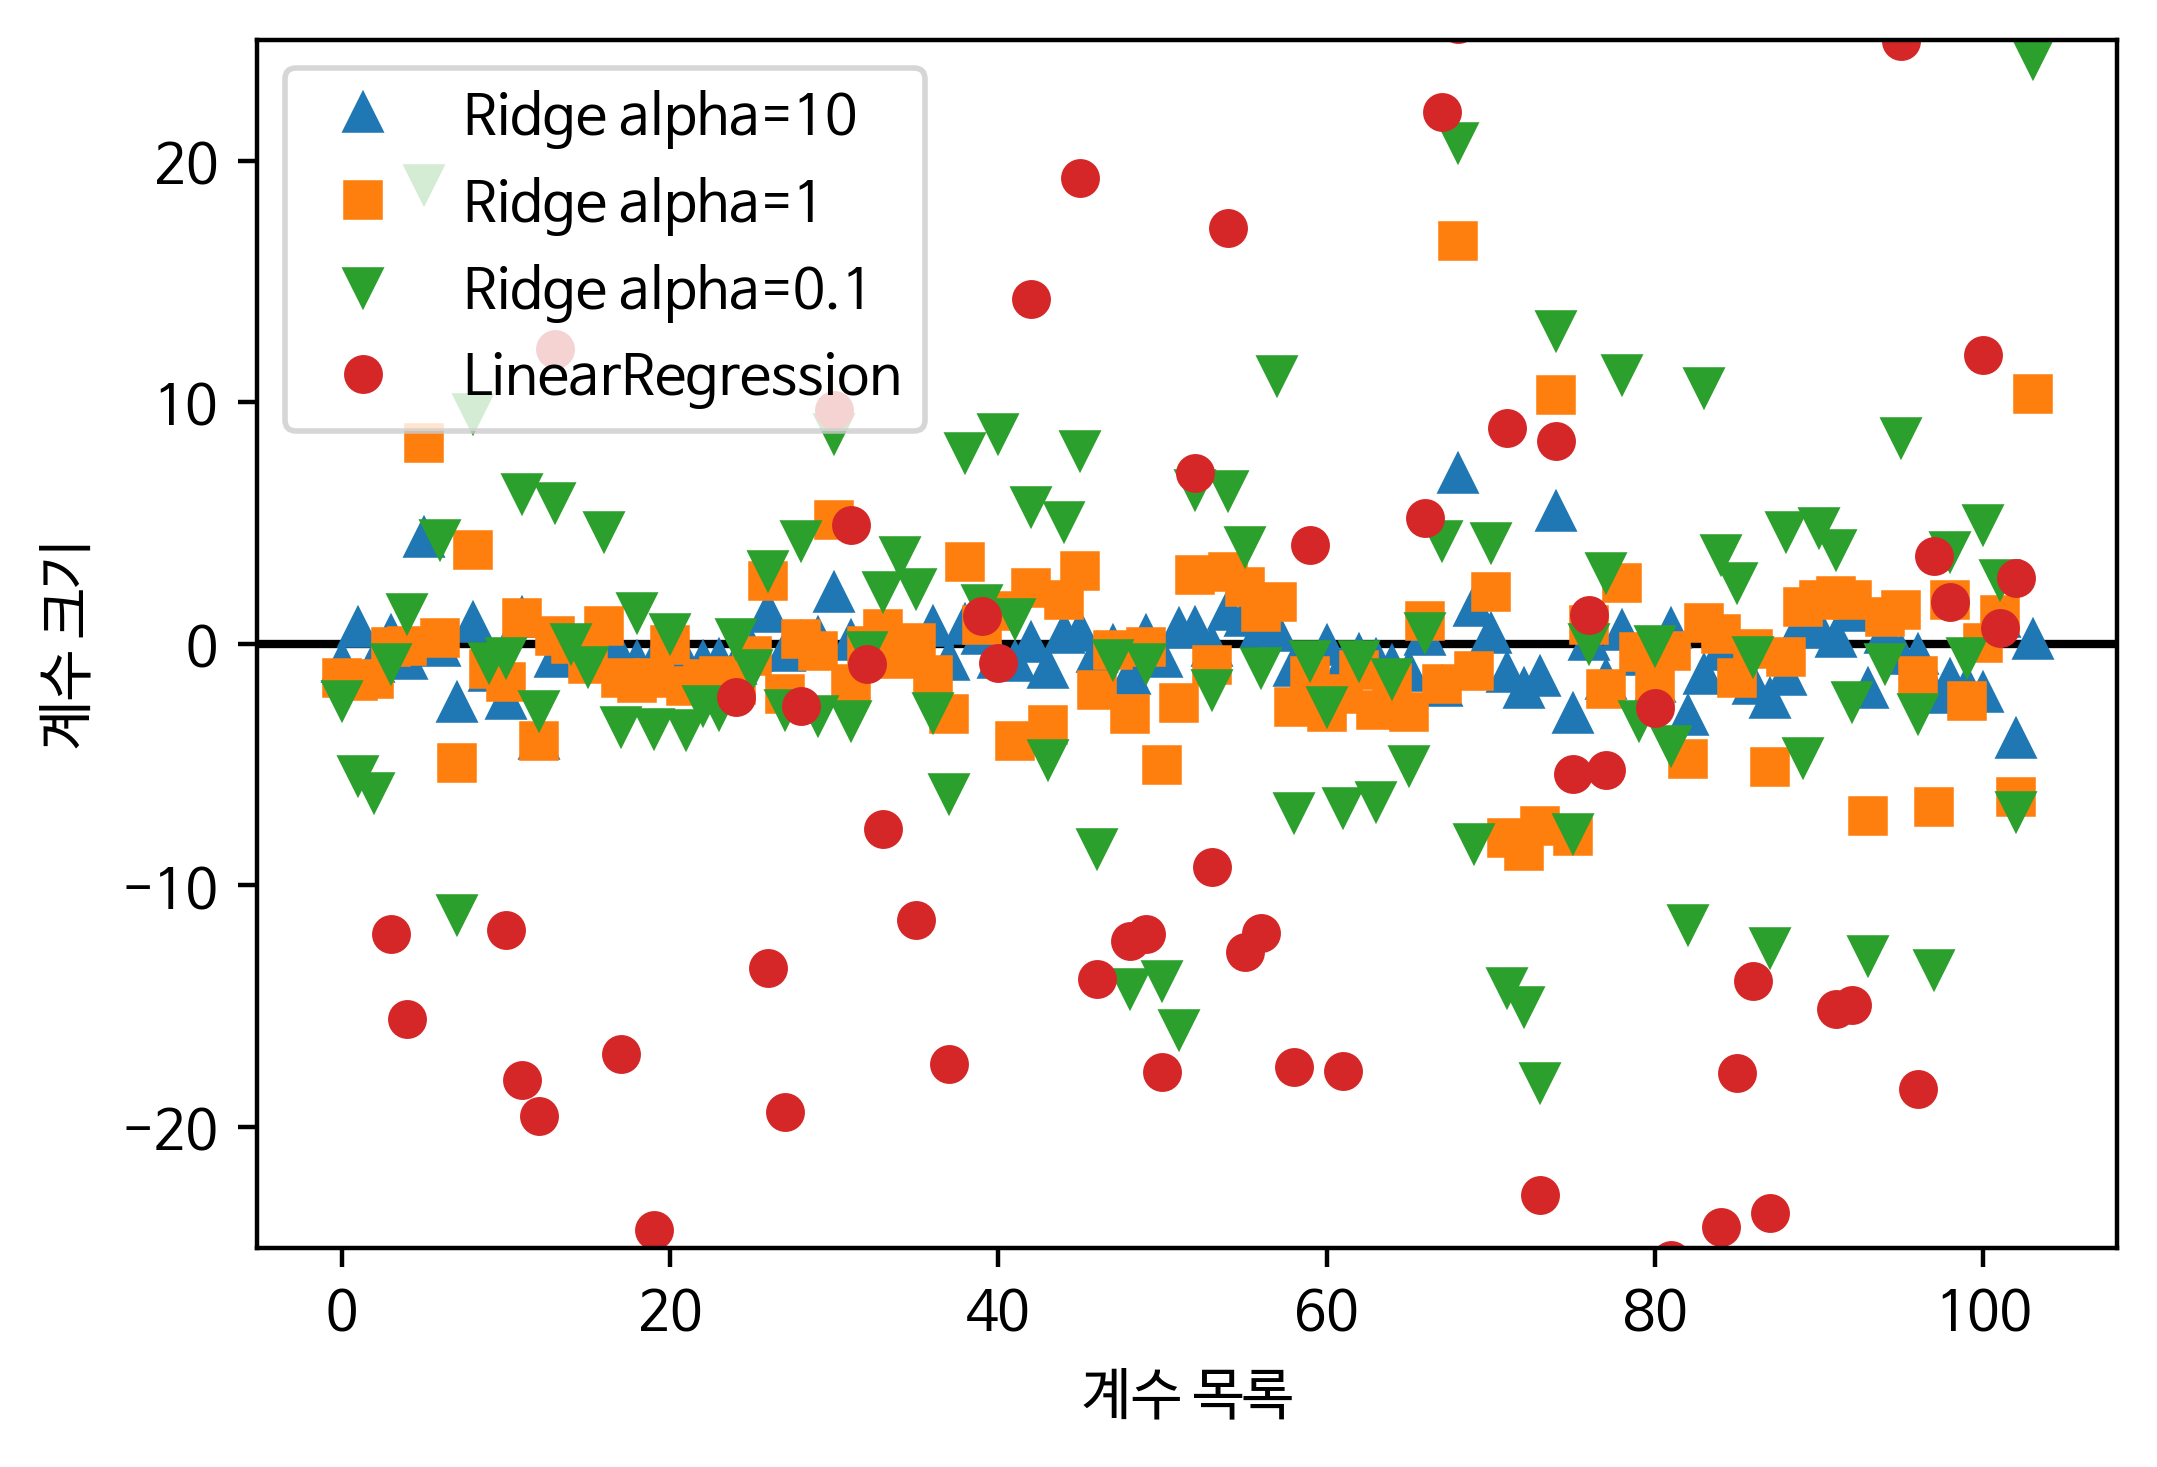

In [ ]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 200)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

Lasso

확장된 보스턴 주택가격 데이터셋에 라쏘를 적용

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : ",lasso.score(X_train, y_train))
print("테스트 세트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0)) # 4개의 특성만 사용했기 때문에 점수 낮음
# 과소 적합된 상태

훈련 세트 점수 :  0.29323768991114607
테스트 세트 점수 :  0.20937503255272294
사용한 특성의 개수: 4


과소적합을 줄이기 위해서 alpha 값 설정

In [ ]:
# alpha 값을 줄임으로써 특성값을 수용하게함 따라서 사용하는 특성값 많아져서 점수 올라감
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 세트 점수 : ", lasso001.score(X_test, y_test))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련 세트 점수 :  0.8961122320864716
테스트 세트 점수 :  0.7677995670886713
사용한 특성의 개수: 32


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)
